In [3]:
# Относительные ссылки, включая импорты, относительно корневой папки проекта
import os
# os.chdir(os.path.dirname(os.getcwd())) (???? что-то непонятное,, скорее всего только нужно при запуске у них, т.к. по сути берет и отправляет нас в корень диска)

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

### Датасет

In [4]:
fact = pd.read_csv("./data/hackaton/fact_train_test.csv", sep=";", decimal=",", encoding="windows-1251")
fact["period"] = fact["period"].astype("datetime64[ns]")

fact.head()

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,real_wagon_count
0,2012-07-01,1,5,1,328,1193,30252,13005,10036,71.0,1
1,2012-10-01,1,5,1,328,1193,30252,11376,10036,210.0,3
2,2014-03-01,0,1,1,328,3472,30252,29548,10036,67.0,1
3,2014-03-01,0,1,1,328,3472,30252,29158,10036,67.0,1
4,2014-03-01,0,2,1,328,3472,30252,27484,10036,66.0,1


### Общие сведения о данных

In [5]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559232 entries, 0 to 3559231
Data columns (total 11 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   period                  datetime64[ns]
 1   rps                     int64         
 2   podrod                  int64         
 3   filial                  int64         
 4   client_sap_id           int64         
 5   freight_id              int64         
 6   sender_station_id       int64         
 7   recipient_station_id    int64         
 8   sender_organisation_id  int64         
 9   real_weight             float64       
 10  real_wagon_count        int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 298.7 MB


In [6]:
fact.columns

Index(['period', 'rps', 'podrod', 'filial', 'client_sap_id', 'freight_id',
       'sender_station_id', 'recipient_station_id', 'sender_organisation_id',
       'real_weight', 'real_wagon_count'],
      dtype='object')

In [7]:
print("Период т.е. YY-MM-DD")
print("Род состава (rps) -", fact['rps'].unique())
print("Имя клиента отправителя (client_sap_id/holding_name) -", fact['client_sap_id'].unique().size, sorted(fact['client_sap_id'].unique()))
print("Станция источник (sender_station_id/sender_department_name) -", fact['sender_station_id'].unique().size, sorted(fact['sender_station_id'].unique())[:10])
print("Станция получатель (recipient_station_id/recipient_department_name) -", fact['recipient_station_id'].unique().size, sorted(fact['recipient_station_id'].unique()))

print("Кол-во вагонов -", fact['real_wagon_count'].unique().size, sorted(fact['real_wagon_count'].unique()))
print("Кол-во веса вагонов -",fact['real_weight'].unique().size, sorted(fact['real_weight'].unique()))

Период т.е. YY-MM-DD
Род состава (rps) - [1 0]
Имя клиента отправителя (client_sap_id/holding_name) - 2036 [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201

In [8]:
fact.describe()

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,real_wagon_count
count,3559232,3.559232e+06,3.559232e+06,3.559232e+06,3.559232e+06,3.559232e+06,3.559232e+06,3.559232e+06,3.559232e+06,3.559232e+06,3.559232e+06
mean,2020-01-01 04:50:29.038176256,5.979641e-01,3.338106e+00,1.148843e+00,3.865685e+02,1.712424e+03,2.628122e+04,2.598168e+04,1.499681e+04,1.349654e+03,1.988760e+01
min,2012-07-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,0.000000e+00
25%,2018-06-01 00:00:00,0.000000e+00,2.000000e+00,1.000000e+00,-1.000000e+00,1.059000e+03,1.427200e+04,1.373100e+04,7.856000e+03,6.500000e+01,1.000000e+00
50%,2020-01-01 00:00:00,1.000000e+00,5.000000e+00,1.000000e+00,1.080000e+02,1.622000e+03,3.051900e+04,3.079000e+04,1.202600e+04,1.300000e+02,2.000000e+00
75%,2021-08-01 00:00:00,1.000000e+00,5.000000e+00,1.000000e+00,6.010000e+02,2.219000e+03,3.519600e+04,3.519600e+04,2.201100e+04,3.990000e+02,6.000000e+00
max,2023-03-01 00:00:00,1.000000e+00,9.000000e+00,2.000000e+00,2.417000e+03,5.086000e+03,3.912300e+04,3.912300e+04,3.453600e+04,8.204350e+05,1.180900e+04
std,NaN,4.903092e-01,1.964952e+00,5.305394e-01,5.398728e+02,1.029591e+03,1.110980e+04,1.146103e+04,8.048006e+03,9.062866e+03,1.301516e+02


### Распределение признаков

array([[<Axes: title={'center': 'period'}>,
        <Axes: title={'center': 'rps'}>,
        <Axes: title={'center': 'podrod'}>],
       [<Axes: title={'center': 'filial'}>,
        <Axes: title={'center': 'client_sap_id'}>,
        <Axes: title={'center': 'freight_id'}>],
       [<Axes: title={'center': 'sender_station_id'}>,
        <Axes: title={'center': 'recipient_station_id'}>,
        <Axes: title={'center': 'sender_organisation_id'}>],
       [<Axes: title={'center': 'real_weight'}>,
        <Axes: title={'center': 'real_wagon_count'}>, <Axes: >]],
      dtype=object)

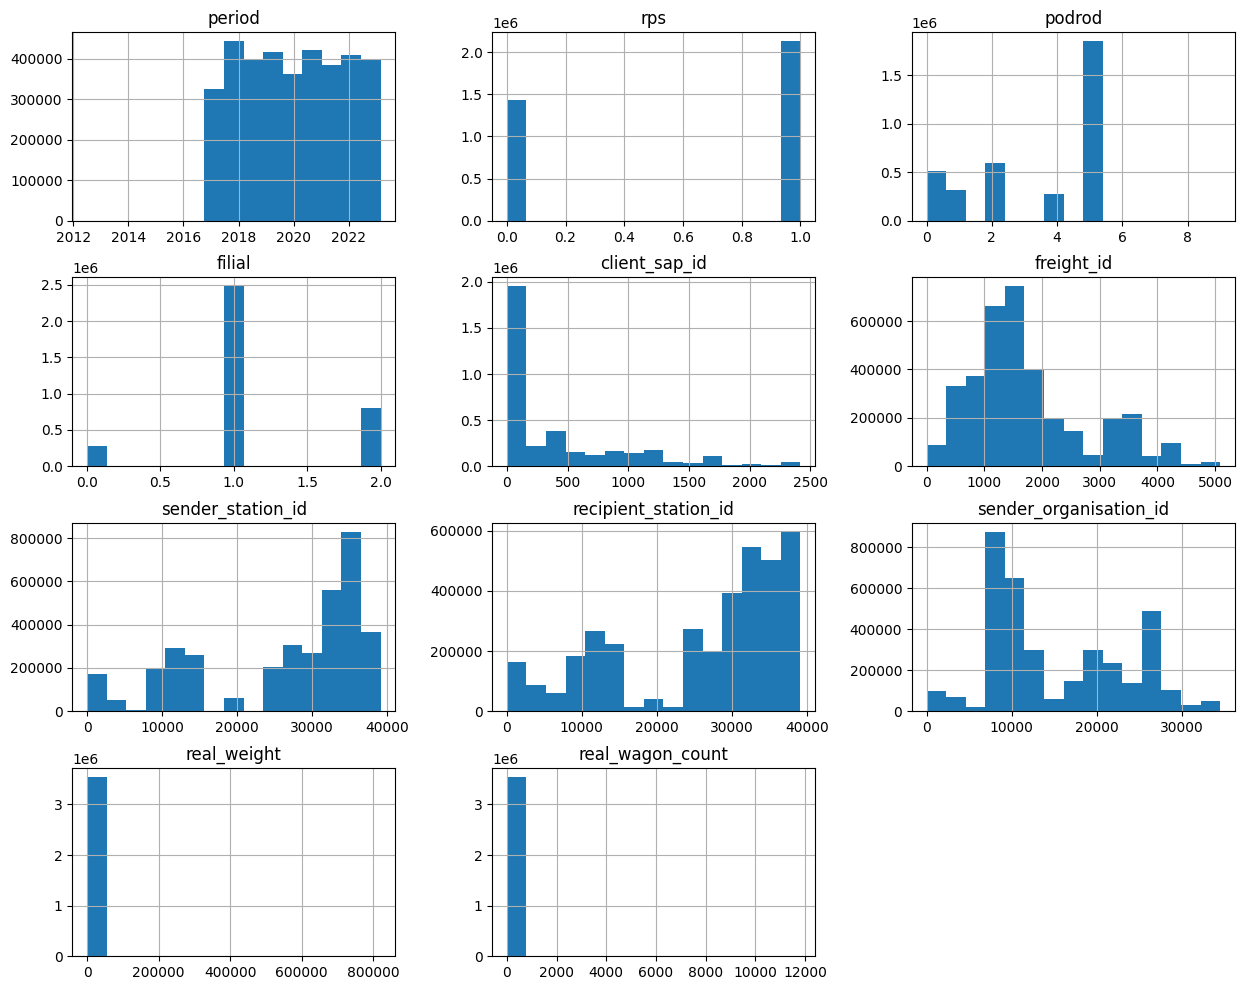

In [9]:
fact.hist(figsize=(15,12),bins = 15)

### Парные графики на последних 10000 заказах

In [10]:
fact10 = fact.tail(10000)
fact10000 = fact10[fact10.columns[2:]]
fact10000

,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,real_wagon_count
3549232,5,1,431,1702,34400,10606,25808,69.0,1
3549233,5,1,431,1702,34400,8730,25808,270.0,4
3549234,5,1,431,1702,34400,8880,25808,515.0,8
3549235,5,1,431,1702,34400,11385,25808,265.0,4
3549236,5,1,431,1702,34400,9988,25808,125.0,2
...,...,...,...,...,...,...,...,...,...
3559227,5,2,1346,1482,31438,31482,0,69.0,1
3559228,5,2,1346,1492,31438,36091,27275,70.0,1
3559229,5,2,1346,1492,31438,35450,27275,70.0,1
3559230,5,2,1346,1492,31438,31482,0,207.0,3


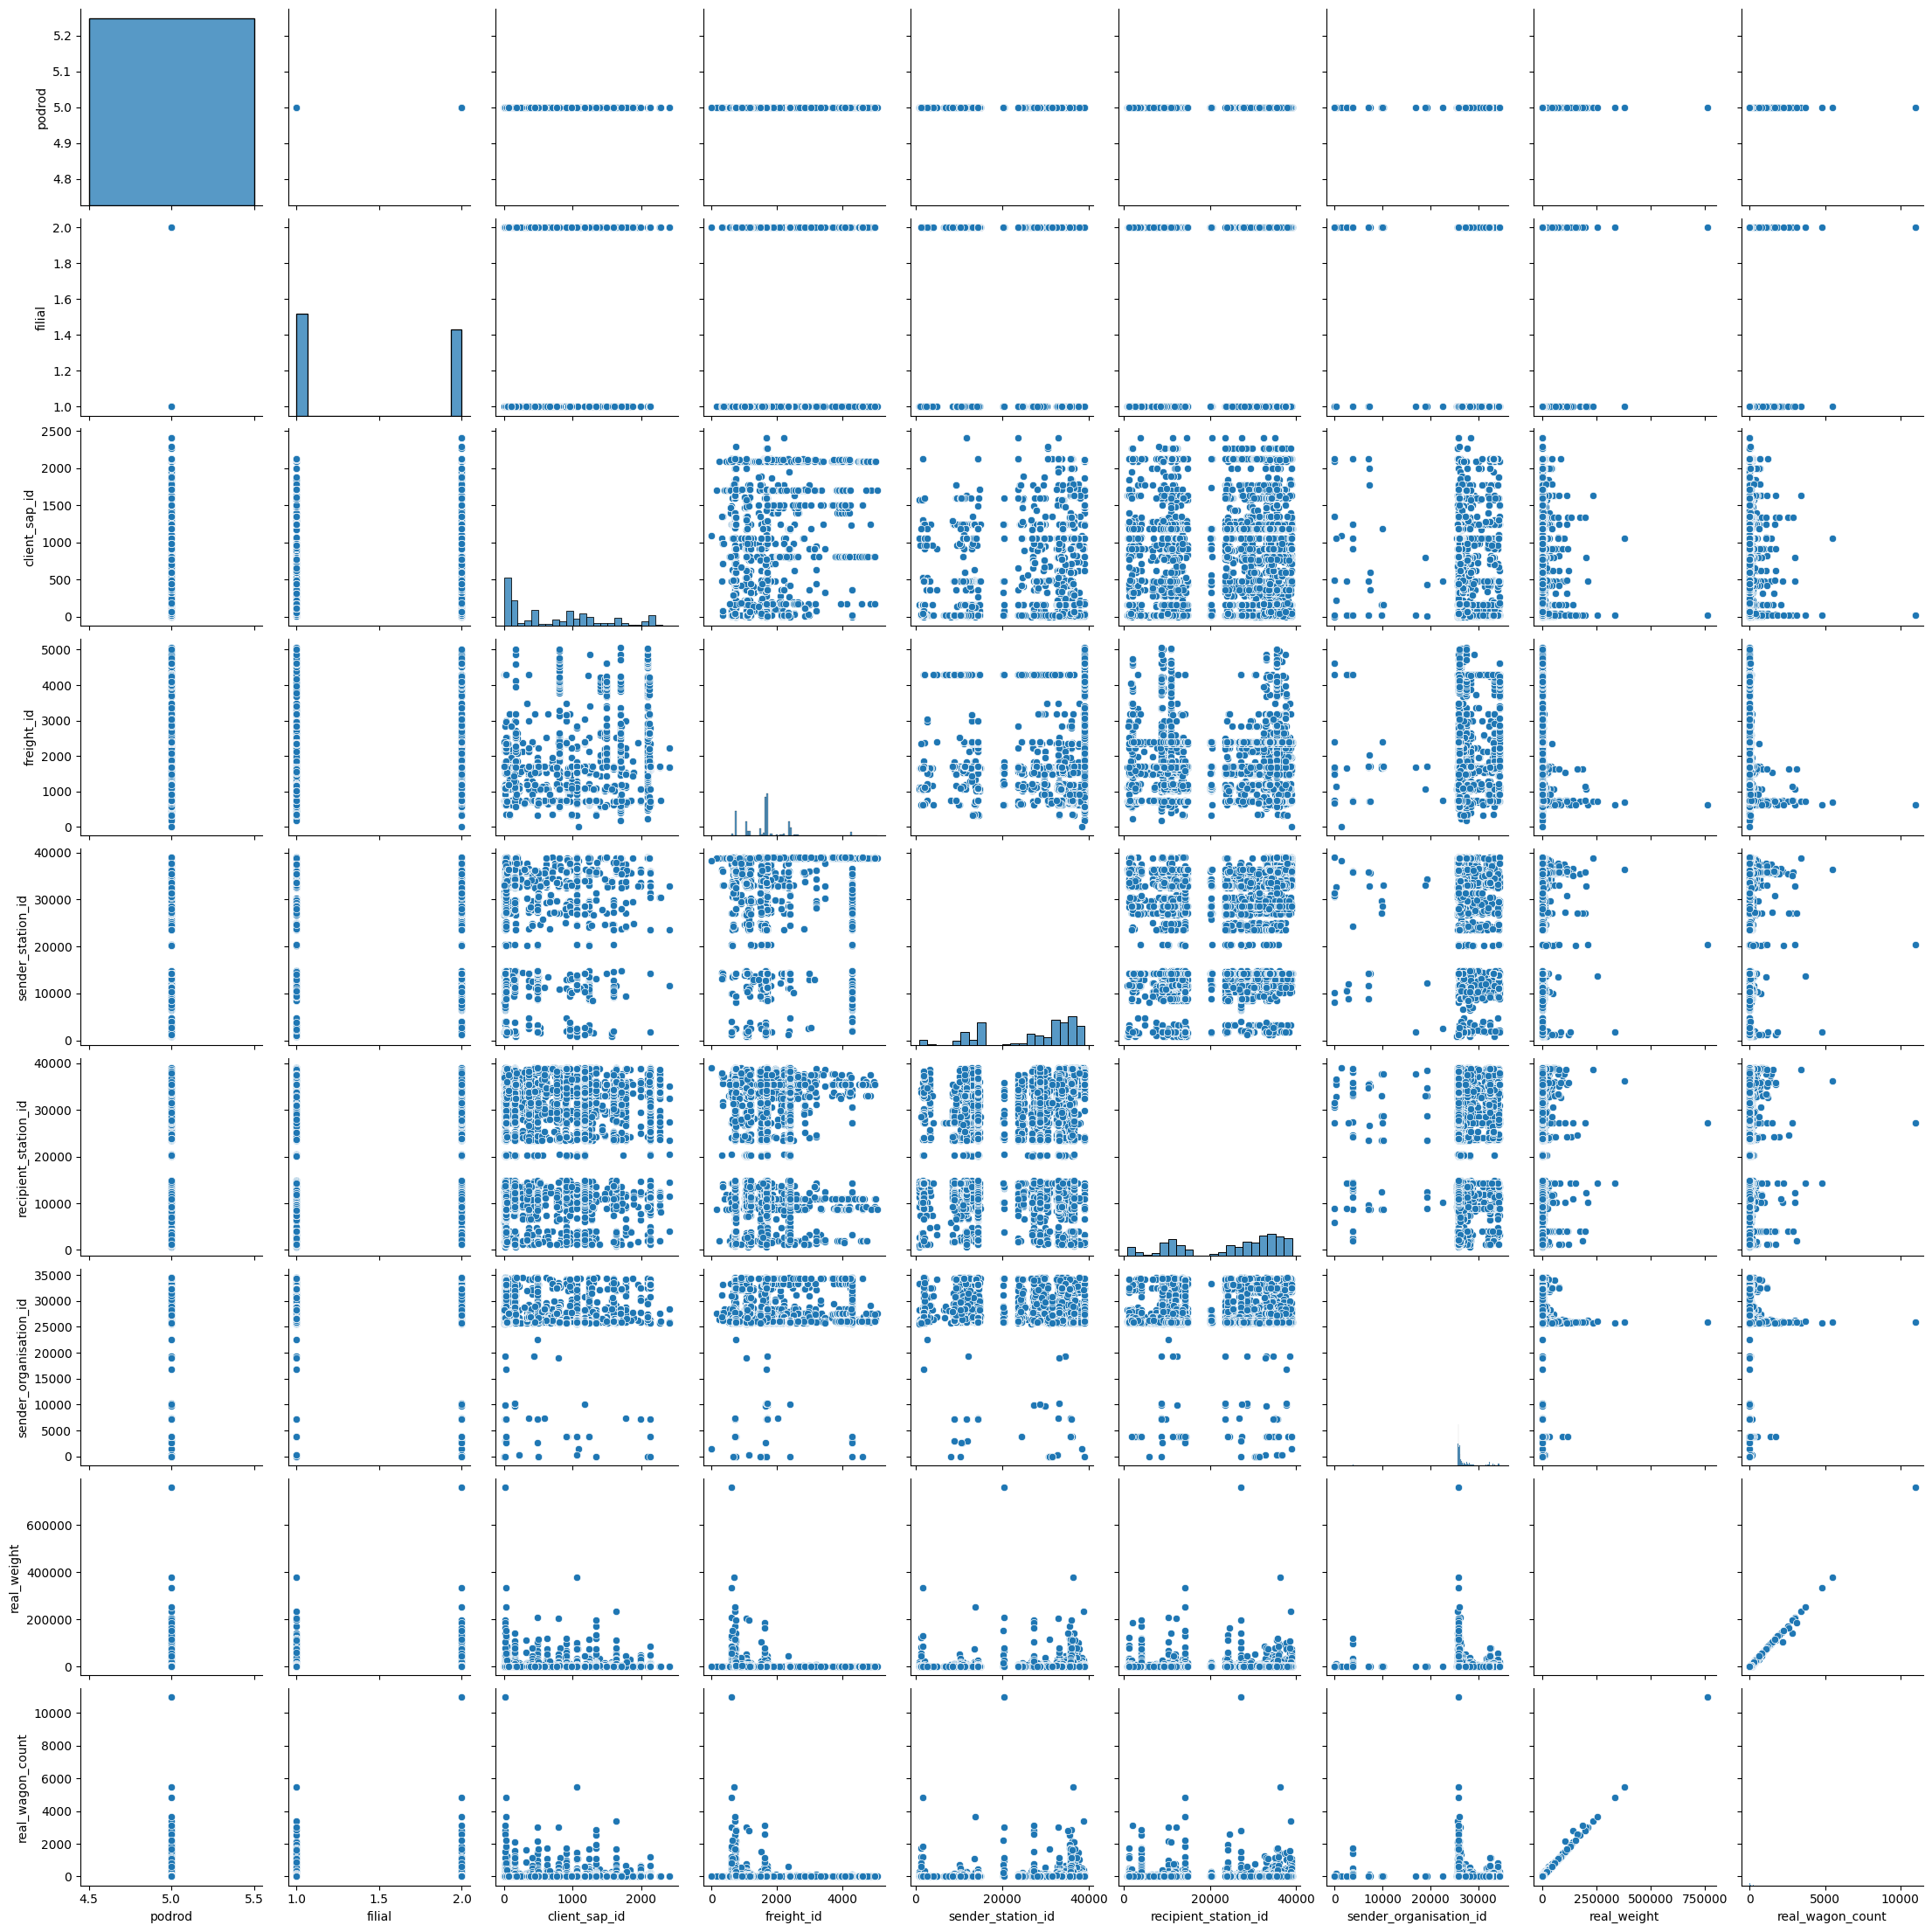

In [12]:
import seaborn as sns

#create pairs plot for all numeric variables
sns.pairplot(fact10000)

### Корреляции

In [13]:
corr_matrix = fact.corr()
corr_matrix

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,real_weight,real_wagon_count
period,1.000000,0.037911,0.011428,-0.020371,0.155588,0.003402,0.021792,-0.011922,0.687117,0.006151,0.005760
rps,0.037911,1.000000,0.949643,-0.124473,0.011871,-0.345959,0.119990,-0.101866,-0.013185,0.108414,0.110028
podrod,0.011428,0.949643,1.000000,-0.121722,-0.006962,-0.318249,0.109985,-0.101409,-0.025948,0.095746,0.098343
filial,-0.020371,-0.124473,-0.121722,1.000000,-0.005331,0.071980,-0.046793,0.011534,-0.044723,-0.034667,-0.033743
client_sap_id,0.155588,0.011871,-0.006962,-0.005331,1.000000,-0.035435,0.088418,0.024225,0.063337,0.058095,0.055654
freight_id,0.003402,-0.345959,-0.318249,0.071980,-0.035435,1.000000,-0.086154,0.044101,0.015974,-0.105683,-0.105060
sender_station_id,0.021792,0.119990,0.109985,-0.046793,0.088418,-0.086154,1.000000,0.264580,-0.003766,0.046819,0.045837
recipient_station_id,-0.011922,-0.101866,-0.101409,0.011534,0.024225,0.044101,0.264580,1.000000,0.001574,0.000229,-0.000669
sender_organisation_id,0.687117,-0.013185,-0.025948,-0.044723,0.063337,0.015974,-0.003766,0.001574,1.000000,-0.015821,-0.015796
real_weight,0.006151,0.108414,0.095746,-0.034667,0.058095,-0.105683,0.046819,0.000229,-0.015821,1.000000,0.997485


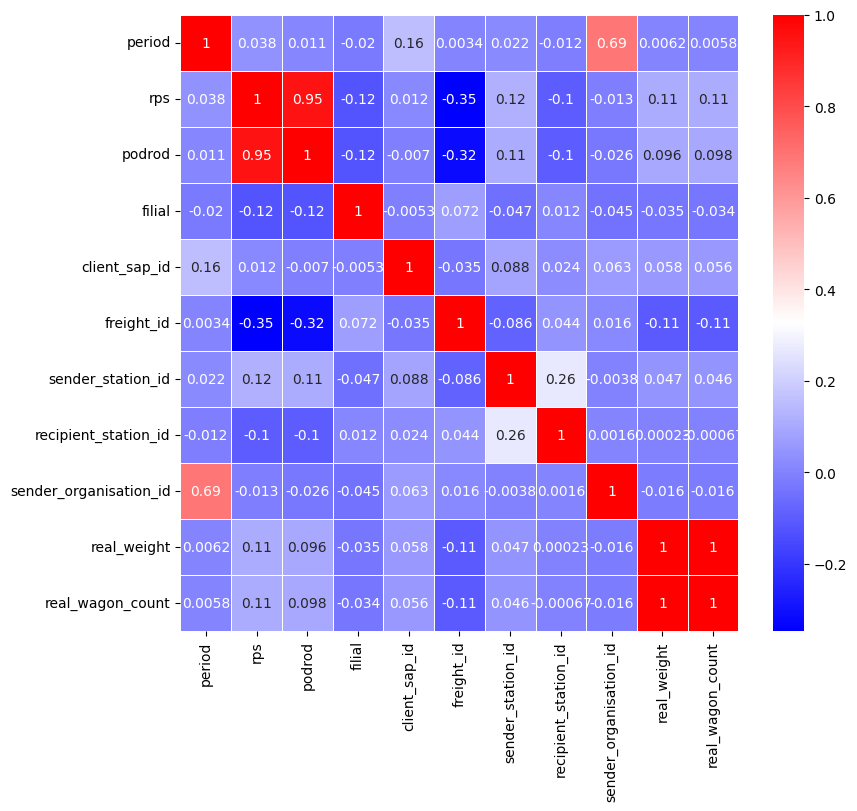

In [14]:
import seaborn as sns
plt.figure(figsize = (9,8))
sns.heatmap(corr_matrix, annot=True,linewidths= 0.5, cmap='bwr')
plt.show()

### ABC-XYZ анализ по станциям отправки

Медиана у вас будет по оси Y, разброс по оси X

In [15]:
var = fact.groupby(['sender_station_id'])['real_weight'].var()
var

sender_station_id
0        3.752791e+04
743      5.504822e+03
777      1.006749e+04
790      4.080952e+01
803      6.901135e+06
             ...     
39089    3.551731e+04
39104    1.210000e+02
39105    2.708061e+08
39114    1.333289e+07
39123    8.629097e+04
Name: real_weight, Length: 3256, dtype: float64

In [16]:
var.sort_values()

sender_station_id
30642    0.0
16388    0.0
16444    0.0
17712    0.0
10135    0.0
        ... 
38611    NaN
38701    NaN
38708    NaN
38793    NaN
39021    NaN
Name: real_weight, Length: 3256, dtype: float64

In [17]:
median = fact.groupby(['sender_station_id'])['real_weight'].median()
median

sender_station_id
0          24.0
743        64.0
777        66.0
790         5.0
803      1015.0
          ...  
39089     122.0
39104      10.0
39105    2527.0
39114     564.0
39123     145.0
Name: real_weight, Length: 3256, dtype: float64

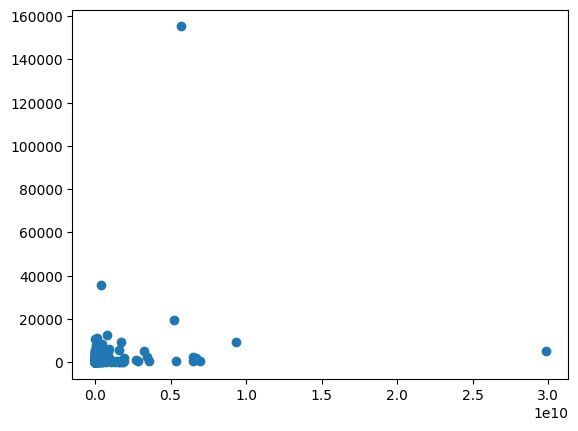

In [18]:
plt.scatter(var,median)
plt.show()

In [19]:
median.name = 'Median'
var.name = 'Variance'

abcxyz_table = pd.concat([median, var], axis=1)

per20 = int(0.2*len(abcxyz_table))
per30 = int(0.3*len(abcxyz_table))

abcxyz_table = abcxyz_table.sort_values(by=['Median'], ascending=False)

abcxyz_table['ABC'] = 'C'
abcxyz_table.loc[abcxyz_table.index[:per20],'ABC'] ='A'
abcxyz_table.loc[abcxyz_table.index[per20:per30],'ABC'] ='B'

per10 = int(0.1*len(abcxyz_table))
per25 = int(0.25*len(abcxyz_table))

abcxyz_table = abcxyz_table.sort_values(by=['Variance'])
abcxyz_table['XYZ'] = 'Z'
abcxyz_table.loc[abcxyz_table.index[:per10],'XYZ'] ='X'
abcxyz_table.loc[abcxyz_table.index[per10:per25],'XYZ'] ='Y'

abcxyz_table = abcxyz_table.sort_values(by='Median')
abcxyz_table

,Median,Variance,ABC,XYZ
sender_station_id,,,,
26908,0.0,0.000000e+00,C,X
26434,0.0,7.429700e+03,C,Y
21157,0.0,1.587000e+03,C,Y
3640,0.0,1.541333e+03,C,Y
26698,0.0,1.069655e+03,C,Y
...,...,...,...,...
33022,11280.0,1.092125e+08,A,Z
32772,12802.0,8.082465e+08,A,Z
9984,19398.0,5.217432e+09,A,Z


In [20]:
abcxyz = pd.DataFrame(str(0), index=['A','B','C'], columns=['X','Y','Z'])

abcxyz.loc['A','X']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='A')  & (abcxyz_table['XYZ']=='X')].index))
abcxyz.loc['B','X']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='B')  & (abcxyz_table['XYZ']=='X')].index))
abcxyz.loc['C','X']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='C')  & (abcxyz_table['XYZ']=='X')].index))
abcxyz.loc['A','Y']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='A')  & (abcxyz_table['XYZ']=='Y')].index))
abcxyz.loc['B','Y']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='B')  & (abcxyz_table['XYZ']=='Y')].index))
abcxyz.loc['C','Y']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='C')  & (abcxyz_table['XYZ']=='Y')].index))
abcxyz.loc['A','Z']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='A')  & (abcxyz_table['XYZ']=='Z')].index))
abcxyz.loc['B','Z']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='B')  & (abcxyz_table['XYZ']=='Z')].index))
abcxyz.loc['C','Z']=', '.join(map(str, abcxyz_table[(abcxyz_table['ABC']=='C')  & (abcxyz_table['XYZ']=='Z')].index))
abcxyz

,X,Y,Z
A,"36735, 36130, 28188","30650, 30772","8419, 10354, 33842, 33636, 34299, 37152, 14502..."
B,"24700, 25613, 18480","30925, 31787, 30960, 3447, 7078, 2361, 31922, ...","24040, 30732, 28243, 37261, 36925, 27374, 2724..."
C,"26908, 1120, 32014, 10833, 32053, 27261, 26332...","26434, 21157, 3640, 26698, 26335, 38287, 12907...","31547, 32246, 10082, 32052, 31996, 30142, 3088..."


### Распределения суммарного веса перевезенного груза и числа вагоноотправок по коду отправителя

Как можно заметить, лидирует отправитель с номером -1, но в таблице нет холдинга, к которому он относится (поэтому можем выкинуть заказы с -1????)

In [21]:
fact.groupby(['client_sap_id'])['real_weight'].sum().sort_values(ascending=False)

client_sap_id
-1       909262571.0
 1634    493201580.0
 1243    306887304.0
 108     301960841.0
 15      243198083.0
            ...     
 1480            1.0
 363             0.0
 1868            0.0
 1598            0.0
 176             0.0
Name: real_weight, Length: 2036, dtype: float64

In [22]:
fact.groupby(['client_sap_id'])['real_wagon_count'].sum().sort_values(ascending=False)

client_sap_id
-1       13716246
 1634     6869941
 108      4405902
 1243     4322594
 15       3667919
           ...   
 1315           1
 1635           1
 1291           1
 2016           1
 1162           1
Name: real_wagon_count, Length: 2036, dtype: int64

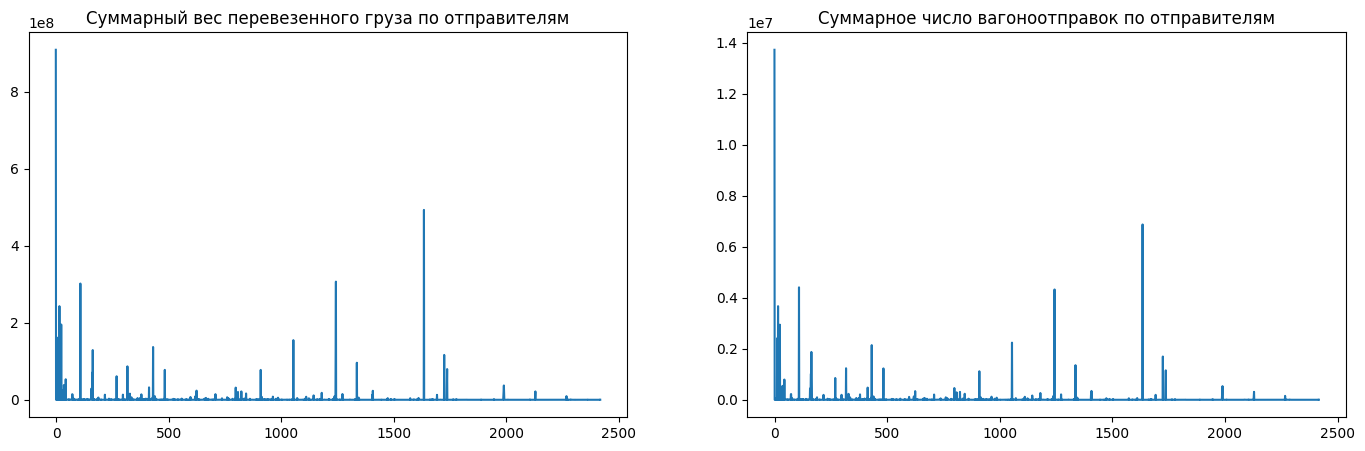

In [23]:
fig, axs = plt.subplots(1,2,figsize=(17,5))
axs[0].plot(fact.groupby(['client_sap_id'])['real_weight'].sum())
axs[0].title.set_text("Суммарный вес перевезенного груза по отправителям")
axs[1].plot(fact.groupby(['client_sap_id'])['real_wagon_count'].sum())
axs[1].title.set_text("Суммарное число вагоноотправок по отправителям")

### Распределения суммарного веса перевезенного груза и числа вагоноотправок по пункту отправления

In [24]:
fact.groupby(['sender_station_id'])['real_weight'].sum().sort_values(ascending=False)

sender_station_id
35748    253543530.0
20384    164295668.0
36664    128067414.0
35716    122765396.0
35715    113567516.0
            ...     
5699             0.0
30885            0.0
30884            0.0
10100            0.0
5619             0.0
Name: real_weight, Length: 3256, dtype: float64

In [25]:
fact.groupby(['sender_station_id'])['real_wagon_count'].sum().sort_values(ascending=False)

sender_station_id
35748    3566700
20384    2355984
36664    1832794
35716    1728139
35715    1588647
          ...   
11529          1
30484          1
7017           1
6902           1
19602          1
Name: real_wagon_count, Length: 3256, dtype: int64

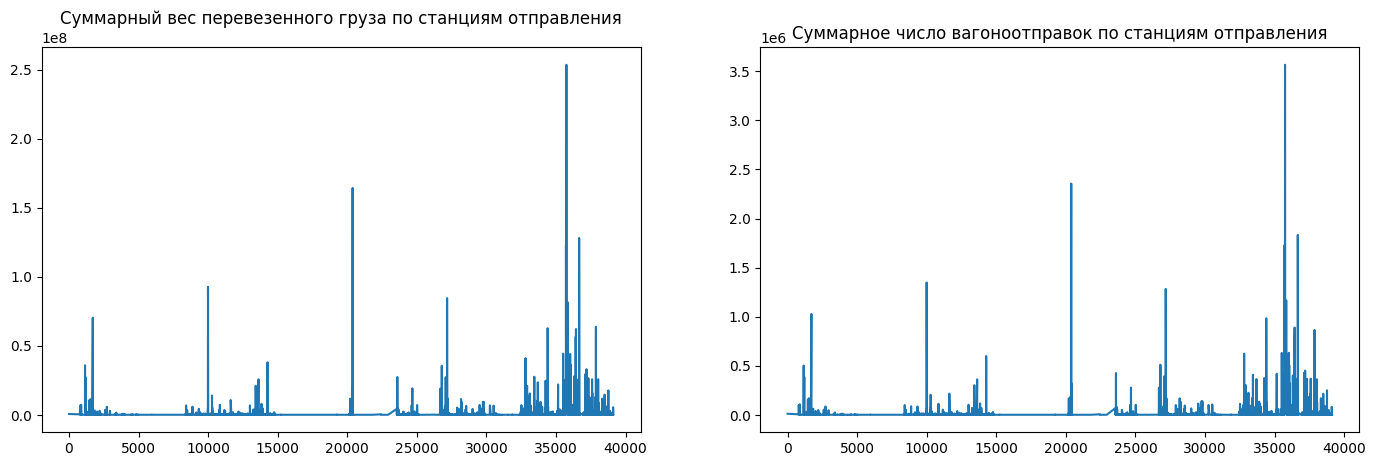

In [26]:
fig, axs = plt.subplots(1,2,figsize=(17,5))
axs[0].plot(fact.groupby(['sender_station_id'])['real_weight'].sum())
axs[0].title.set_text("Суммарный вес перевезенного груза по станциям отправления")
axs[1].plot(fact.groupby(['sender_station_id'])['real_wagon_count'].sum())
axs[1].title.set_text("Суммарное число вагоноотправок по станциям отправления")

### Распределения суммарного веса перевезенного груза и числа вагоноотправок по пункту назначения

In [27]:
fact.groupby(['recipient_station_id'])['real_weight'].sum().sort_values(ascending=False)

recipient_station_id
4042     220849170.0
38905    210841504.0
38629    150843424.0
35809    120277595.0
14272    110629798.0
            ...     
38011            0.0
35596            0.0
21903            0.0
7792             0.0
30143            0.0
Name: real_weight, Length: 4684, dtype: float64

In [28]:
fact.groupby(['recipient_station_id'])['real_wagon_count'].sum().sort_values(ascending=False)

recipient_station_id
4042     3114268
38905    2917609
38629    2076099
35809    1755279
14272    1646043
          ...   
12725          1
16330          1
33967          1
16371          1
36248          1
Name: real_wagon_count, Length: 4684, dtype: int64

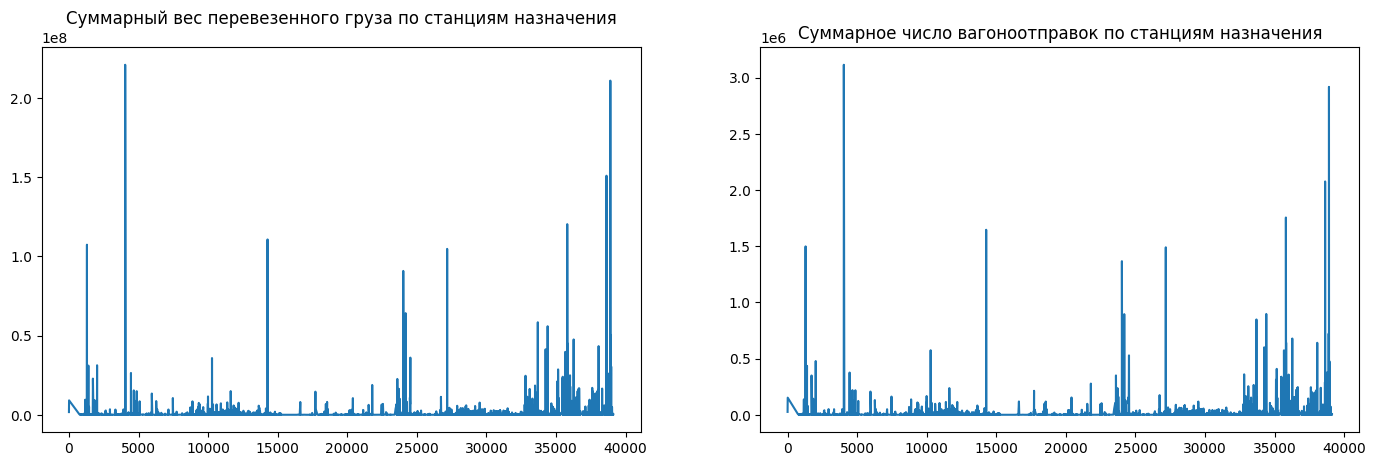

In [29]:
fig, axs = plt.subplots(1,2,figsize=(17,5))
axs[0].plot(fact.groupby(['recipient_station_id'])['real_weight'].sum())
axs[0].title.set_text("Суммарный вес перевезенного груза по станциям назначения")
axs[1].plot(fact.groupby(['recipient_station_id'])['real_wagon_count'].sum())
axs[1].title.set_text("Суммарное число вагоноотправок по станциям назначения")

### Исследование временных рядов

Text(0.5, 0.98, 'Общее число веса перевезенного груза и вагоноперевозок за все время')

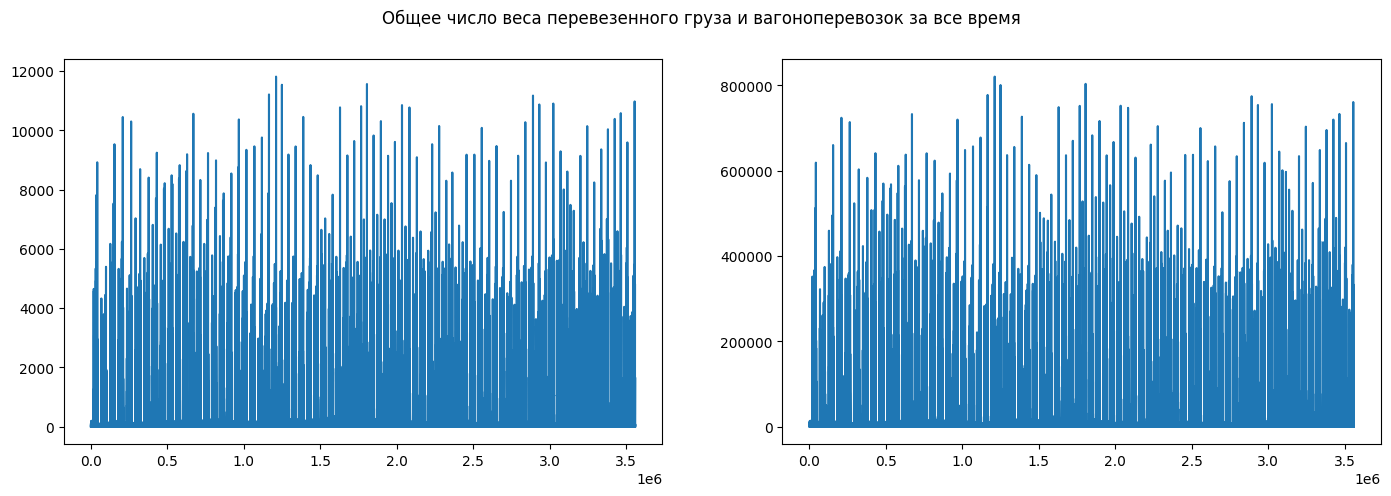

In [30]:
fig, axs = plt.subplots(1,2,figsize=(17,5))
axs[0].plot(fact['real_wagon_count'])
axs[1].plot(fact['real_weight'])
fig.suptitle("Общее число веса перевезенного груза и вагоноперевозок за все время")

In [31]:
def summarize(x):
    summ_up = pd.DataFrame(columns=['real_wagon_count', 'real_weight'])

    summ_up= sum(x['real_wagon_count'])
    summ_up.loc[1] = sum(x['real_weight'])

    return summ_up

fact_ = fact[:len(fact)].copy()
fact_.index = pd.to_datetime(fact_.index)

summed_up = fact_.groupby(["period", "rps", "sender_station_id", "recipient_station_id"])["real_wagon_count"].sum()

summed_up

period      rps  sender_station_id  recipient_station_id
2012-07-01  1    30252              13005                      1
2012-10-01  1    30252              11376                      3
2014-03-01  0    30252              27484                      1
                                    29158                      1
                                    29548                      1
                                                            ... 
2023-03-01  1    39026              39068                    300
                 39074              38995                     36
                 39105              39026                   1347
                 39114              39036                    136
                 39123              13537                      1
Name: real_wagon_count, Length: 2071523, dtype: int64

In [32]:
def generate_range_dates_month_year(start_year, end_year, step_year=1, step_month=1):
    date_strings = [f'{year}-{month:02d}-01' for year in range(start_year, end_year + 1, step_year)
                    for month in range(1, 13, step_month)]
    date_range = pd.to_datetime(date_strings)
    return date_range

items = generate_range_dates_month_year(2012, 2023)

items

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=144, freq=None)

### Исследование числа заказываемых вагонов за все время

In [33]:
summed_up = fact_.groupby(["period"])["real_wagon_count"].sum()

summed_up_ = pd.DataFrame(0, index=items, columns=['real_wagon_count'])

summed_up_.update(summed_up)
summed_up_ = summed_up_["2016-05-01":"2023-04-01"]
summed_up_.head(10)

,real_wagon_count
2016-05-01,0
2016-06-01,0
2016-07-01,0
2016-08-01,2
2016-09-01,0
2016-10-01,0
2016-11-01,0
2016-12-01,14373
2017-01-01,893937
2017-02-01,855138


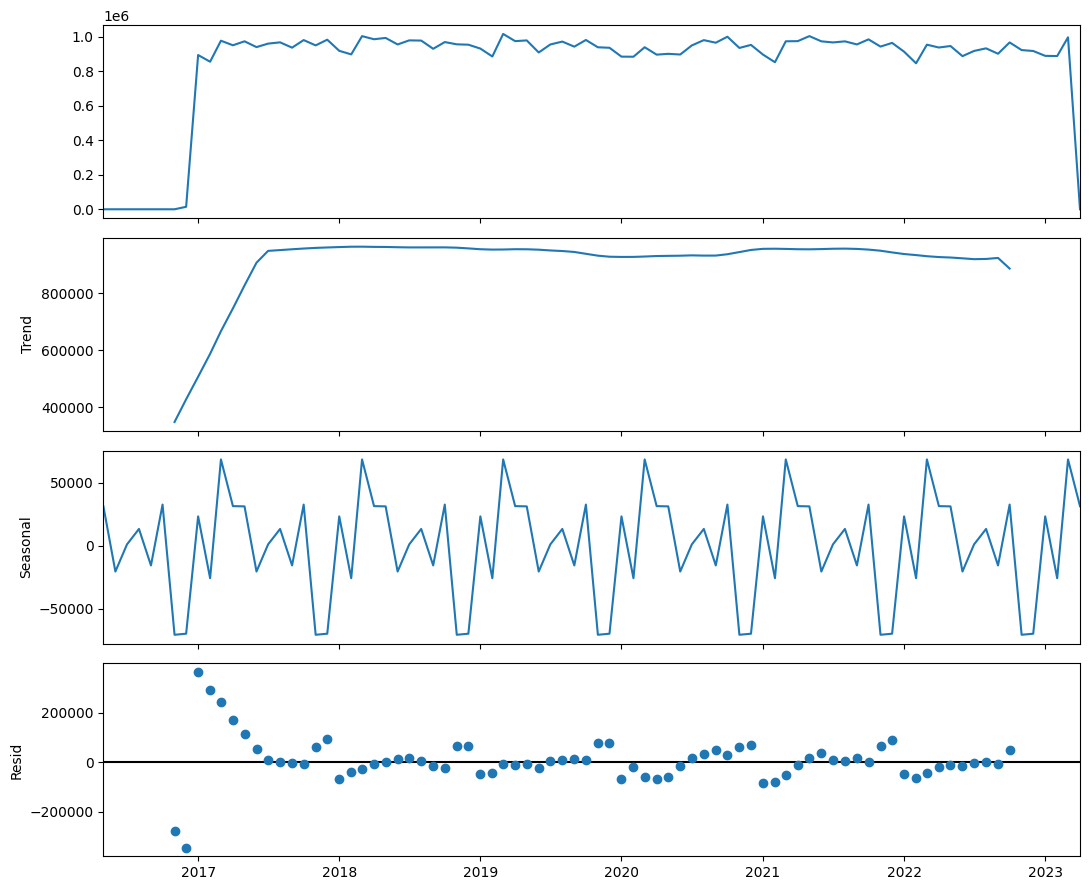

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(summed_up_)
decompose.plot()
plt.show()

### Исследование заказываемой массы вагонов за все время

In [35]:
summed_up = fact_.groupby(["period"])["real_weight"].sum()

summed_up_ = pd.DataFrame(0, index=items, columns=['real_weight'])

summed_up_.update(summed_up)
summed_up_ = summed_up_["2016-05-01":"2023-04-01"]
summed_up_.head(10)

,real_weight
2016-05-01,0
2016-06-01,0
2016-07-01,0
2016-08-01,138
2016-09-01,0
2016-10-01,0
2016-11-01,0
2016-12-01,945359
2017-01-01,60265316
2017-02-01,57432381


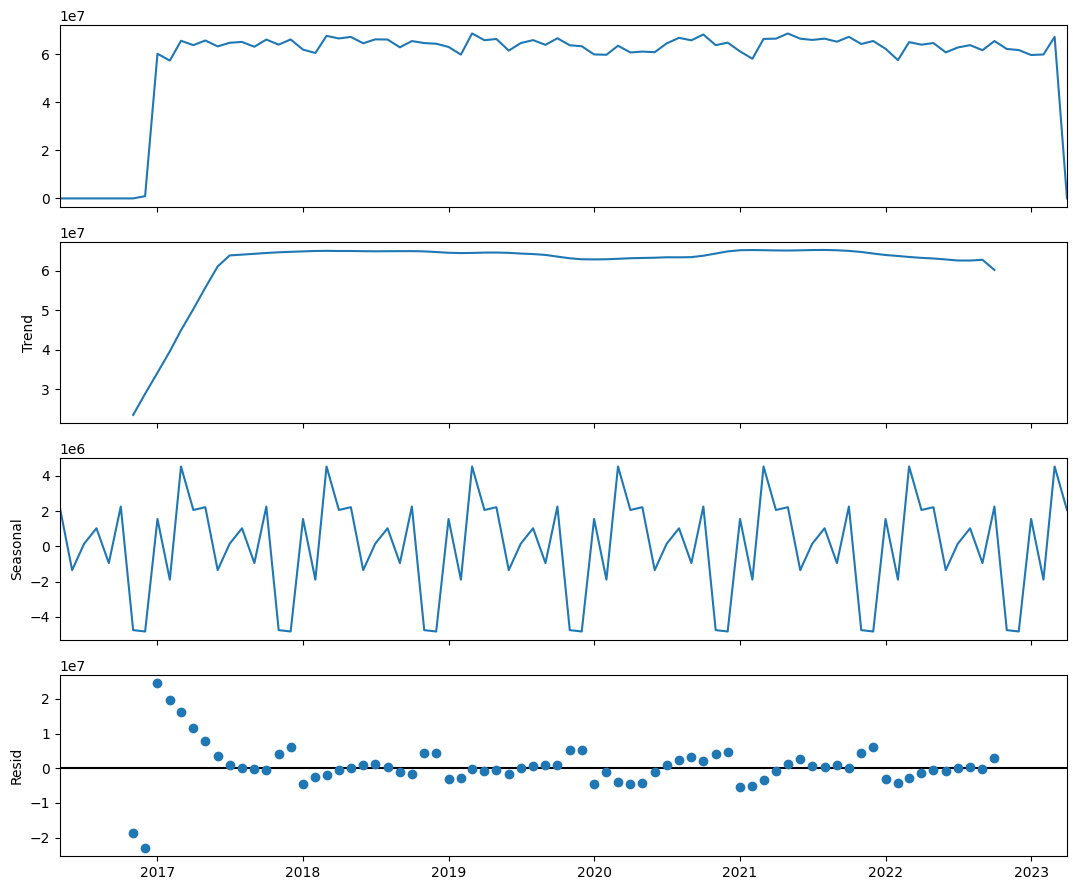

In [36]:
rcParams['figure.figsize'] = 11, 9

decompose = seasonal_decompose(summed_up_)
decompose.plot()
plt.show()

Можно заметить, что графики для числа вагонов и весов схожи по форме. Полагаю, причина в том, что корреляция между этими признаками - 1

### Предсказывание числа вагонов и веса на следующие 6 месяцев

In [37]:
from statsmodels.tsa.arima.model import ARIMA

fact = fact[fact['period'] >= '2016-12-01']
monthly_wagon_count = fact.groupby('period')['real_wagon_count'].sum()
monthly_wagon_count.index = pd.to_datetime(monthly_wagon_count.index)

model = ARIMA(monthly_wagon_count, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=6)
forecast

d:\Programming\Neural\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Programming\Neural\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Programming\Neural\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-04-01    985223.960066
2023-05-01    993168.523196
2023-06-01    987630.100754
2023-07-01    991491.121510
2023-08-01    988799.473945
2023-09-01    990675.912087
Freq: MS, Name: predicted_mean, dtype: float64

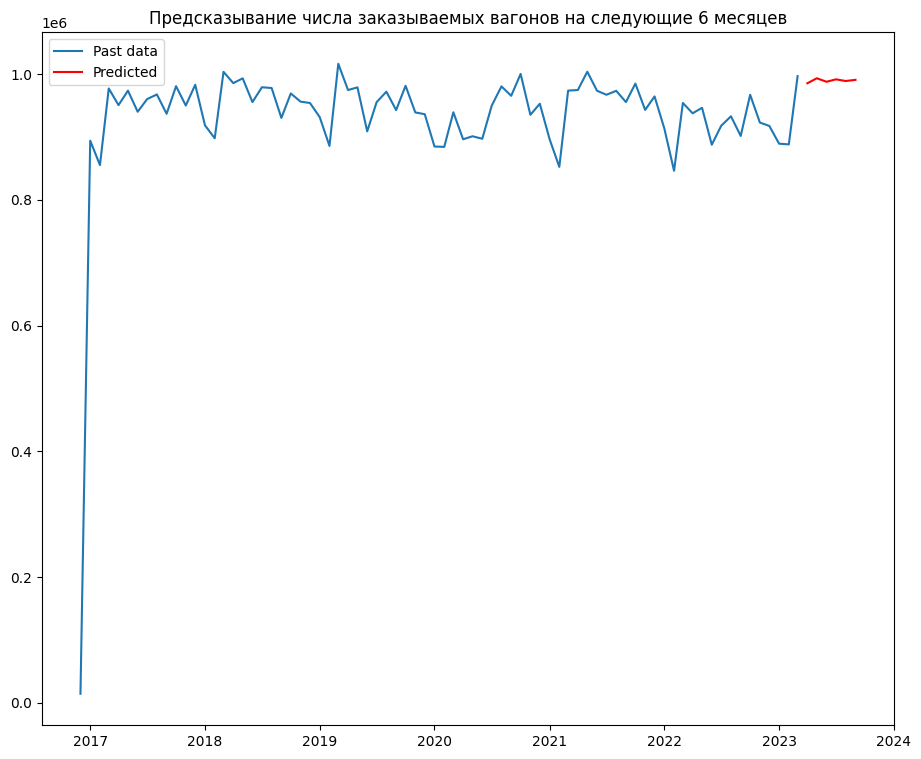

In [38]:
plt.title("Предсказывание числа заказываемых вагонов на следующие 6 месяцев")
plt.plot(monthly_wagon_count, label = 'Past data')
plt.plot(forecast, color="r", label='Predicted')
plt.legend()
plt.show()

In [39]:
monthly_weights_count = fact.groupby('period')['real_weight'].sum()
monthly_weights_count.index = pd.to_datetime(monthly_weights_count.index)

model = ARIMA(monthly_weights_count, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=6)
forecast

d:\Programming\Neural\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Programming\Neural\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Programming\Neural\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2023-04-01    6.654493e+07
2023-05-01    6.708822e+07
2023-06-01    6.670104e+07
2023-07-01    6.697697e+07
2023-08-01    6.678033e+07
2023-09-01    6.692046e+07
Freq: MS, Name: predicted_mean, dtype: float64

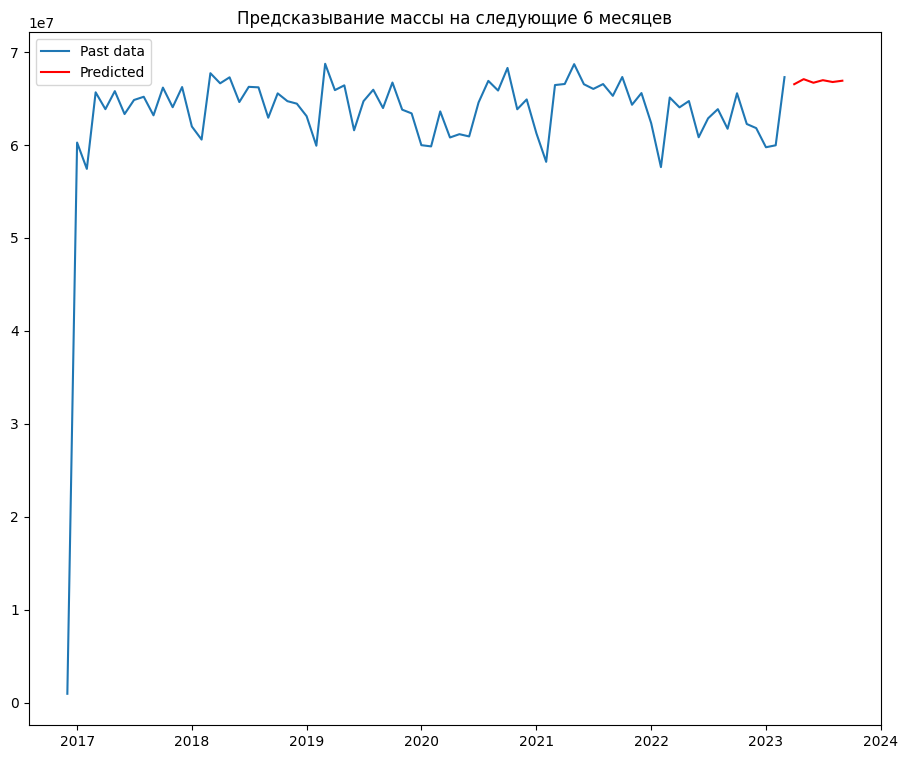

In [40]:
plt.title("Предсказывание массы на следующие 6 месяцев")
plt.plot(monthly_weights_count, label = 'Past data')
plt.plot(forecast, color="r", label='Predicted')
plt.legend()
plt.show()

# PCA (Метод главных компонент)

[[-4.28179331e-08 -2.88443663e-03  1.66042153e-03 -6.64536423e-01
  -7.47248415e-01 -2.68654880e-04]
 [-9.31509688e-06 -3.18557414e-03  1.17091215e-02 -7.47178330e-01
   6.64512604e-01 -5.38819469e-04]]


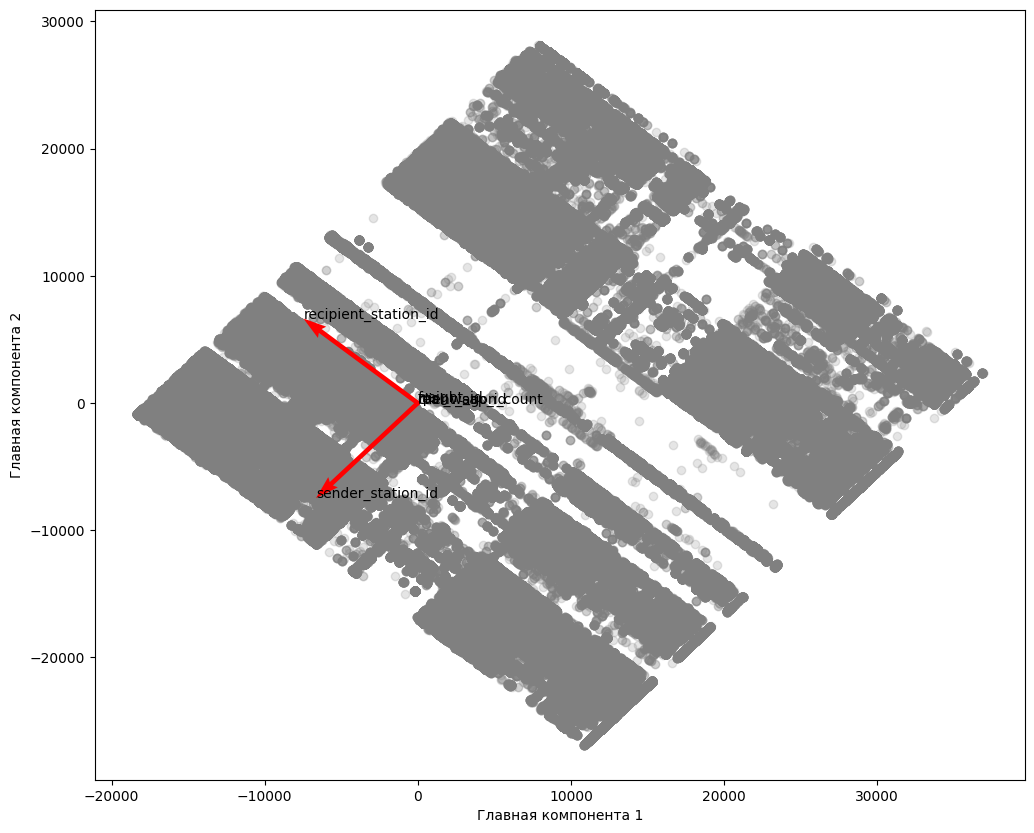

In [41]:
from sklearn.decomposition import PCA
x_fact = fact.drop(['period'], axis=1)
x_fact_cats = x_fact[["rps","client_sap_id","freight_id","sender_station_id","recipient_station_id"]]
x_fact_noCats = x_fact[["real_wagon_count"]]

x_fact_proccesed = pd.concat([x_fact_cats, x_fact_noCats], axis=1)

componetns_scale = 1e4

plt.figure(figsize=(12, 10))

pca = PCA(n_components=2)

X_pca = pca.fit_transform(x_fact_proccesed)
pca_components = pca.components_[:2, :]
print(pca_components)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='grey', alpha=0.2)

for i, feature in enumerate(x_fact_proccesed.columns):
    plt.quiver(0, 0, pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale, angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
    plt.annotate(feature, (pca_components[0, i]*componetns_scale, pca_components[1, i]*componetns_scale), color='black')

plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

# CatBoost

In [42]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(fact, test_size=0.2, shuffle=False)

X_train, y_train = train_data[['period',"rps","sender_station_id","recipient_station_id"]], train_data[["real_wagon_count"]]
X_test, y_test = test_data[['period',"rps","sender_station_id","recipient_station_id"]], test_data[["real_wagon_count"]]

X_train['period'] = X_train['period'] .apply(lambda x: x.timestamp())
X_test['period']  = X_test['period'] .apply(lambda x: x.timestamp())

print(f"Dates train      : {X_train['period'].min()} --- {X_train['period'].max()}  ({len(X_train)/len(fact)*100:.2f}%)")
print(f"Dates test       : {X_test['period'].min()} --- {X_test['period'].max()}  ({len(X_test)/len(fact)*100:.2f}%)")
y_train.dtypes

C:\Users\asego\AppData\Local\Temp\ipykernel_7160\3303196348.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['period'] = X_train['period'] .apply(lambda x: x.timestamp())


Dates train      : 1480550400.0 --- 1638316800.0  (80.00%)
Dates test       : 1638316800.0 --- 1677628800.0  (20.00%)


C:\Users\asego\AppData\Local\Temp\ipykernel_7160\3303196348.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['period']  = X_test['period'] .apply(lambda x: x.timestamp())


real_wagon_count    int64
dtype: object

In [43]:
model = CatBoostRegressor(loss_function='RMSE', depth=3, learning_rate=0.4, iterations=1000, 
    random_seed=18, 
    od_type='Iter',
    od_wait=20,
)

model.fit(
    X_train, y_train, use_best_model=True,
    eval_set=(X_test, y_test),
    verbose=False,  
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [44]:
y_pred = model.predict(X_test)

y_pred = y_pred.astype(np.int32)

test_res = X_test.assign(pred=y_pred)
test_res = test_res.assign(real=y_test)

test_res

,period,rps,sender_station_id,recipient_station_id,pred,real
2847388,1.638317e+09,0,35100,37456,0,0
2847389,1.638317e+09,0,35100,37456,0,0
2847390,1.638317e+09,0,35100,37456,0,0
2847391,1.638317e+09,0,35223,31431,1,4
2847392,1.638317e+09,0,35100,4701,8,1
...,...,...,...,...,...,...
3559227,1.677629e+09,1,31438,31482,9,1
3559228,1.677629e+09,1,31438,36091,8,1
3559229,1.677629e+09,1,31438,35450,8,1
3559230,1.677629e+09,1,31438,31482,9,3


In [45]:
forecast = fact[-len(y_pred):].assign(forecast_wagon_count=y_pred)
forecast = forecast.drop("real_wagon_count", axis=1)
forecast = forecast.rename(columns={"real_weight":"forecast_weight"})

forecast.to_csv("f.csv", index=False, sep=";", decimal=",", encoding="windows-1251")
forecast

,period,rps,podrod,filial,client_sap_id,freight_id,sender_station_id,recipient_station_id,sender_organisation_id,forecast_weight,forecast_wagon_count
2847388,2021-12-01,0,0,1,1459,1458,35100,37456,22449,0.0,0
2847389,2021-12-01,0,0,1,1459,1521,35100,37456,22449,2.0,0
2847390,2021-12-01,0,0,1,1459,1703,35100,37456,22449,2.0,0
2847391,2021-12-01,0,0,1,1018,40,35223,31431,19673,253.0,1
2847392,2021-12-01,0,0,1,1018,3432,35100,4701,19673,67.0,8
...,...,...,...,...,...,...,...,...,...,...,...
3559227,2023-03-01,1,5,2,1346,1482,31438,31482,0,69.0,9
3559228,2023-03-01,1,5,2,1346,1492,31438,36091,27275,70.0,8
3559229,2023-03-01,1,5,2,1346,1492,31438,35450,27275,70.0,8
3559230,2023-03-01,1,5,2,1346,1492,31438,31482,0,207.0,9


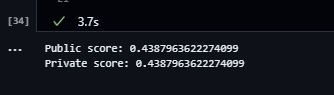